In [23]:
import numpy as np 
import pandas as pd 

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [24]:
df1 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.12/2022.06.12.csv')
df2 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.13/2022.06.13.csv')
df3 = pd.read_csv('/kaggle/input/luflow-network-intrusion-detection-data-set/2022/06/2022.06.14/2022.06.14.csv')

In [25]:
df_dataset = pd.concat([df1, df2, df3])
df_dataset.reset_index(drop=True, inplace=True)
df_dataset = df_dataset.drop(['time_start', 'time_end', 'dest_ip', 'src_ip'], axis=1)

In [26]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068376 entries, 0 to 1068375
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1068376 non-null  float64
 1   bytes_in       1068376 non-null  int64  
 2   bytes_out      1068376 non-null  int64  
 3   dest_port      964168 non-null   float64
 4   entropy        1068376 non-null  float64
 5   num_pkts_out   1068376 non-null  int64  
 6   num_pkts_in    1068376 non-null  int64  
 7   proto          1068376 non-null  int64  
 8   src_port       964168 non-null   float64
 9   total_entropy  1068376 non-null  float64
 10  label          1068376 non-null  object 
 11  duration       1068376 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 97.8+ MB


In [27]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# drop missing values
df_dataset.dropna(inplace=True)

df_dataset.drop_duplicates(inplace = True)
print(df_dataset.duplicated().sum())


0


In [28]:
df_dataset.columns

Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_port', 'total_entropy',
       'label', 'duration'],
      dtype='object')

In [29]:
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
df_dataset.dropna(inplace=True)

In [31]:
print(df_dataset.duplicated().sum())

0


In [32]:
df_dataset.drop_duplicates(inplace = True)

In [33]:
print(df_dataset.duplicated().sum())

0


In [34]:
df_dataset.drop_duplicates(inplace = True)

In [35]:
print(df_dataset.duplicated().sum())

0


In [36]:
df_dataset["label"].value_counts()

label
benign       434553
outlier      352045
malicious     72182
Name: count, dtype: int64

In [37]:
old_value = 'outlier'
new_value = 0
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [38]:
old_value = 'malicious'
new_value = 1
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

In [39]:
old_value = 'benign'
new_value = 2
df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)

/tmp/ipykernel_389/3502624556.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dataset['label'] = df_dataset['label'].replace(old_value, new_value)


In [40]:
df_dataset["label"].value_counts()

label
2    434553
0    352045
1     72182
Name: count, dtype: int64

In [41]:
from sklearn.preprocessing import MinMaxScaler

df_dataset['byte_ratio'] = df_dataset['bytes_in'] / (df_dataset['bytes_out'] + 1e-9)
# df_dataset['pkt_ratio'] = df_dataset['num_pkts_in'] / (df_dataset['num_pkts_out'] + 1e-9)
# df_dataset['byte_pkt_in_ratio'] = df_dataset['bytes_in'] / (df_dataset['num_pkts_in'] + 1e-9)
# df_dataset['byte_pkt_out_ratio'] = df_dataset['bytes_out'] / (df_dataset['num_pkts_out'] + 1e-9)
df_dataset['entropy_per_byte'] = df_dataset['entropy'] / (df_dataset['bytes_in'] + df_dataset['bytes_out'] + 1e-9)
df_dataset['total_entropy_ratio'] = df_dataset['total_entropy'] / (df_dataset['bytes_in'] + df_dataset['bytes_out'] + 1e-9)
df_dataset['is_well_known_src_port'] = df_dataset['src_port'].apply(lambda x: 1 if x < 1024 else 0)
df_dataset['is_well_known_dest_port'] = df_dataset['dest_port'].apply(lambda x: 1 if x < 1024 else 0)
df_dataset['byte_diff'] = df_dataset['bytes_in'] - df_dataset['bytes_out']
# df_dataset['pkt_diff'] = df_dataset['num_pkts_in'] - df_dataset['num_pkts_out']
# df_dataset['flow_efficiency'] = (df_dataset['bytes_in'] + df_dataset['bytes_out']) / (df_dataset['num_pkts_in'] + df_dataset['num_pkts_out'] + 1e-9)
df_dataset['bidirectional_entropy_ratio'] = df_dataset['entropy'] / (df_dataset['total_entropy'] + 1e-9)
df_dataset['total_bytes'] = df_dataset['bytes_in'] + df_dataset['bytes_out']
# df_dataset['total_pkts'] = df_dataset['num_pkts_in'] + df_dataset['num_pkts_out']
# df_dataset['avg_byte_per_pkt'] = df_dataset['total_bytes'] / (df_dataset['total_pkts'] + 1e-9)
df_dataset['log_bytes_in'] = np.log1p(df_dataset['bytes_in'])
df_dataset['log_bytes_out'] = np.log1p(df_dataset['bytes_out'])
df_dataset['log_duration'] = np.log1p(df_dataset['duration'])
# from sklearn.preprocessing import OneHotEncoder

# proto_encoded = pd.get_dummies(df_dataset['proto'], prefix='proto')
# df_dataset = pd.concat([df_dataset, proto_encoded], axis=1).drop('proto', axis=1)
scaler = MinMaxScaler()
continuous_features = ['bytes_in', 'bytes_out', 'duration', 'avg_ipt', 'entropy']
df_dataset[continuous_features] = scaler.fit_transform(df_dataset[continuous_features])

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_dataset.drop(['label'], axis=1).values
y = df_dataset['label'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# model 3
# class SimpleLinearModel(nn.Module):
#     def __init__(self, input_size, output_size):
#         super(SimpleLinearModel, self).__init__()
#         self.linear1 = nn.Linear(input_size, 128)
#         self.linear2 = nn.Linear(128, 64)
#         self.linear3 = nn.Linear(64, 32)
#         self.linear4 = nn.Linear(32, output_size)
    
#     def forward(self, x):
#         x = self.linear1(x)
#         x = self.linear2(x)
#         x = self.linear3(x)
#         x = self.linear4(x)
#         return x

# model 2
class ImprovedLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ImprovedLinearModel, self).__init__()
        self.linear1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)  # Add Batch Normalization
        self.dropout1 = nn.Dropout(0.3)  # Dropout for regularization
        
        self.linear2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)
        
        self.linear3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.3)
        
        self.linear4 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.bn1(self.linear1(x)))  # Apply ReLU and BatchNorm
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.linear2(x)))
        x = self.dropout2(x)
        
        x = F.relu(self.bn3(self.linear3(x)))
        x = self.dropout3(x)
        
        x = self.linear4(x)  
        return x

# model 3
# class ResidualBlock(nn.Module):
#     def __init__(self, in_features, out_features, dropout_rate=0.3):
#         super(ResidualBlock, self).__init__()
#         self.linear1 = nn.Linear(in_features, out_features)
#         self.bn1 = nn.BatchNorm1d(out_features)
#         self.activation1 = nn.GELU()  # Advanced activation function
        
#         self.linear2 = nn.Linear(out_features, out_features)
#         self.bn2 = nn.BatchNorm1d(out_features)
#         self.activation2 = nn.GELU()
        
#         self.dropout = nn.Dropout(dropout_rate)
        
#         # If input and output dimensions differ, adjust with a linear layer
#         if in_features != out_features:
#             self.residual = nn.Linear(in_features, out_features)
#         else:
#             self.residual = nn.Identity()
    
#     def forward(self, x):
#         residual = self.residual(x)
        
#         out = self.linear1(x)
#         out = self.bn1(out)
#         out = self.activation1(out)
#         out = self.dropout(out)
        
#         out = self.linear2(out)
#         out = self.bn2(out)
#         out = self.activation2(out)
#         out = self.dropout(out)
        
#         out += residual  # Residual connection
#         return out

# class SelfAttention(nn.Module):
#     def __init__(self, embed_dim, num_heads):
#         super(SelfAttention, self).__init__()
#         self.attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
#         self.norm = nn.LayerNorm(embed_dim)
#         self.dropout = nn.Dropout(0.2)
    
#     def forward(self, x):
#         attn_output, _ = self.attention(x, x, x)
#         x = self.norm(attn_output + x)
#         x = self.dropout(x)
#         return x

# class EnhancedDeepModel(nn.Module):
#     def __init__(self, input_size, output_size):
#         super(EnhancedDeepModel, self).__init__()
#         self.input_layer = nn.Linear(input_size, 512)
#         self.bn_input = nn.BatchNorm1d(512)
#         self.activation_input = nn.GELU()
#         self.dropout_input = nn.Dropout(0.4)
        
#         # Residual Blocks
#         self.res_block1 = ResidualBlock(512, 512, dropout_rate=0.4)
#         self.res_block2 = ResidualBlock(512, 256, dropout_rate=0.4)
#         self.res_block3 = ResidualBlock(256, 256, dropout_rate=0.3)
#         self.res_block4 = ResidualBlock(256, 128, dropout_rate=0.3)
#         self.res_block5 = ResidualBlock(128, 128, dropout_rate=0.2)
        
#         # Self-Attention Layer
#         self.attention = SelfAttention(embed_dim=128, num_heads=4)
        
#         # Fully Connected Layers
#         self.fc1 = nn.Linear(128, 64)
#         self.bn_fc1 = nn.BatchNorm1d(64)
#         self.activation_fc1 = nn.GELU()
#         self.dropout_fc1 = nn.Dropout(0.2)
        
#         self.fc2 = nn.Linear(64, output_size)
        
#         # Output activation can be added based on the task
#         # For classification: nn.Softmax(dim=1)
#         # For regression: typically no activation or nn.ReLU()
    
#     def forward(self, x):
#         # Input Layer
#         x = self.input_layer(x)
#         x = self.bn_input(x)
#         x = self.activation_input(x)
#         x = self.dropout_input(x)
        
#         # Residual Blocks
#         x = self.res_block1(x)
#         x = self.res_block2(x)
#         x = self.res_block3(x)
#         x = self.res_block4(x)
#         x = self.res_block5(x)
        
#         # Prepare for Self-Attention: add sequence dimension
#         x = x.unsqueeze(1)  # (batch_size, 1, features)
#         x = self.attention(x)
#         x = x.squeeze(1)  # (batch_size, features)
        
#         # Fully Connected Layers
#         x = self.fc1(x)
#         x = self.bn_fc1(x)
#         x = self.activation_fc1(x)
#         x = self.dropout_fc1(x)
        
#         x = self.fc2(x)
#         return x

input_size = X_train.shape[1] 
output_size = 3 
learning_rate = 0.001
epochs = 300

model = ImprovedLinearModel(input_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# for epoch in range(epochs):
#     outputs = model(X_train)
#     loss = criterion(outputs, y_train)
    
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     if (epoch+1) % 2 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# with torch.no_grad():
#     outputs = model(X_test)
#     _, predicted = torch.max(outputs, 1)
#     accuracy = (predicted == y_test).sum().item() / len(y_test)
#     print(f'Accuracy on test set: {accuracy * 100:.2f}%')


/tmp/ipykernel_389/3282553078.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/tmp/ipykernel_389/3282553078.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


Using device: cuda
Epoch [10/300], Loss: 0.7681
Epoch [20/300], Loss: 0.5375
Epoch [30/300], Loss: 0.4192
Epoch [40/300], Loss: 0.3489
Epoch [50/300], Loss: 0.3050
Epoch [60/300], Loss: 0.2756
Epoch [70/300], Loss: 0.2550
Epoch [80/300], Loss: 0.2403
Epoch [90/300], Loss: 0.2291
Epoch [100/300], Loss: 0.2205
Epoch [110/300], Loss: 0.2134
Epoch [120/300], Loss: 0.2074
Epoch [130/300], Loss: 0.2026
Epoch [140/300], Loss: 0.1984
Epoch [150/300], Loss: 0.1944
Epoch [160/300], Loss: 0.1914
Epoch [170/300], Loss: 0.1880
Epoch [180/300], Loss: 0.1846
Epoch [190/300], Loss: 0.1820
Epoch [200/300], Loss: 0.1799
Epoch [210/300], Loss: 0.1780
Epoch [220/300], Loss: 0.1758
Epoch [230/300], Loss: 0.1740
Epoch [240/300], Loss: 0.1721
Epoch [250/300], Loss: 0.1701
Epoch [260/300], Loss: 0.1684
Epoch [270/300], Loss: 0.1667
Epoch [280/300], Loss: 0.1656
Epoch [290/300], Loss: 0.1635
Epoch [300/300], Loss: 0.1623


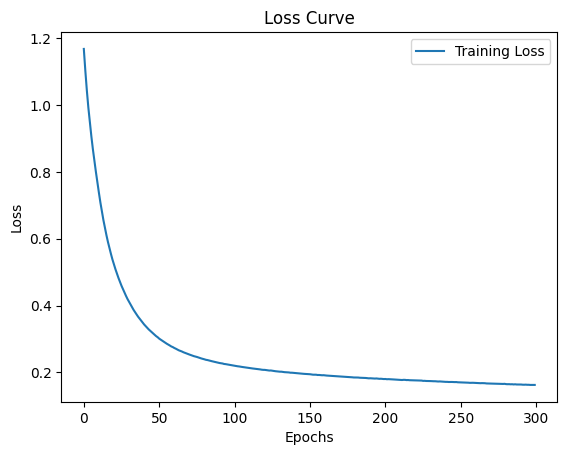

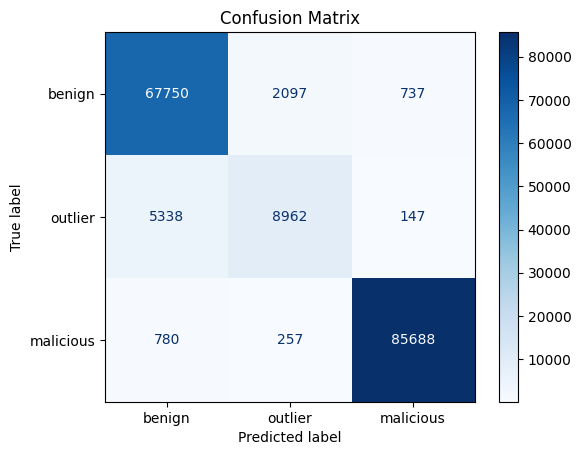

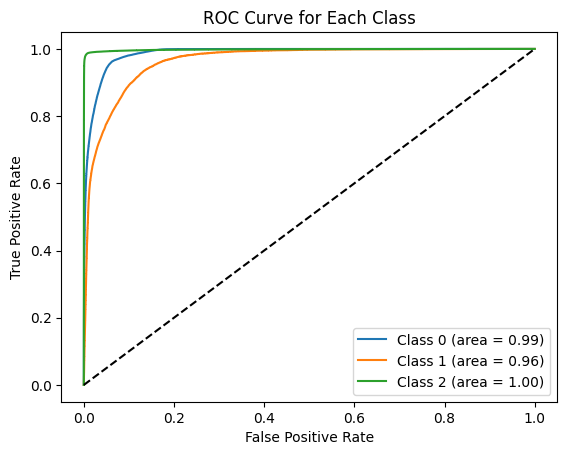

In [46]:
import torch
import torch.nn.functional as F
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

# Move model to GPU
model = model.to(device)

# Move data to GPU
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

loss_values = []

for epoch in range(epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.figure()
plt.plot(range(epochs), loss_values, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

with torch.no_grad():
    outputs = model(X_test)
    probabilities = softmax(outputs, dim=1).cpu().numpy()  # Move to CPU for numpy compatibility
    y_test_np = y_test.cpu().numpy()
    predictions = np.argmax(probabilities, axis=1)

conf_matrix = confusion_matrix(y_test_np, predictions)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=['benign', 'outlier', 'malicious'])
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

plt.figure()
for i in range(output_size):
    binary_true = (y_test_np == i).astype(int)
    fpr, tpr, _ = roc_curve(binary_true, probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


In [47]:
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')


Accuracy on test set: 94.55%
